In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [92]:
from numpy.random import Generator, PCG64

class Bandit():
    """
    Bandit class will handle initiating, updating, and returning values from arms numbered distributions
    """
    
    # Initiate the k distribution parameters
    def __init__(self,arms):
        
        #Means[0,100]
        self.means = list(np.random.randint(low=0, high=100, size=arms))
        #Standard Deviation [0.1,5]
        self.stdev = list(np.random.randint(low=1, high=30, size=arms))
    
    # Update k distribution parameters
    def updateDistributions():
        pass
    
    # Generate random values based on a given input slot
    def pull(self,slot):
        
        generator = Generator(PCG64())
        output =  generator.normal(loc=self.means[slot], 
                                      scale=self.stdev[slot])
        
        return output
        

def banditDistributionPlot(bandit):
    """
    Visualize the bandit arm distribution with a violin plot
    """
    
    #Define shape and metrics of sampling
    ARMS = len(bandit.means)
    N = 1000
    valueArray = np.zeros((N,ARMS))

    
    #Generate Entries
    for i in range(ARMS):
        for j in range(N):
            valueArray[j,i] = bandit.pull(i)
    
    #Plot
    valueDF = pd.DataFrame(valueArray, columns=["Arm "+ str(i) for i in range(1, ARMS+1)])
    ax = plt.figure(figsize=(15,8))
    ax = sns.violinplot(data = valueDF)        

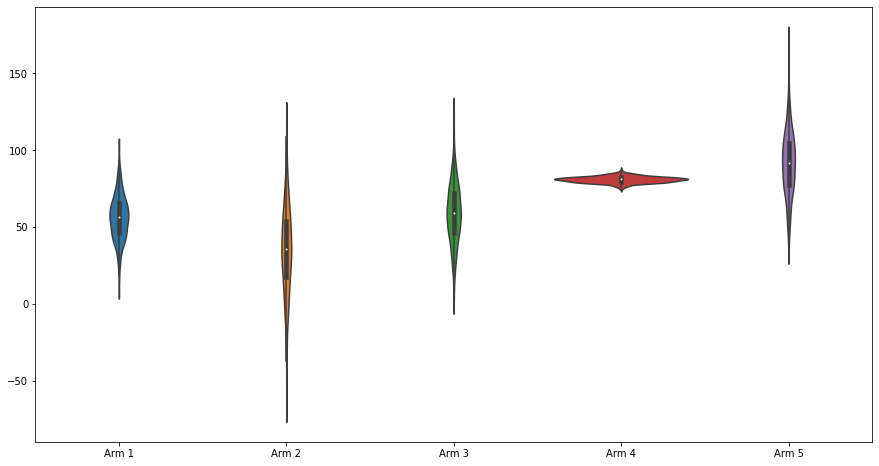

In [93]:
bandit = Bandit(5)      
banditDistributionPlot(bandit)